<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


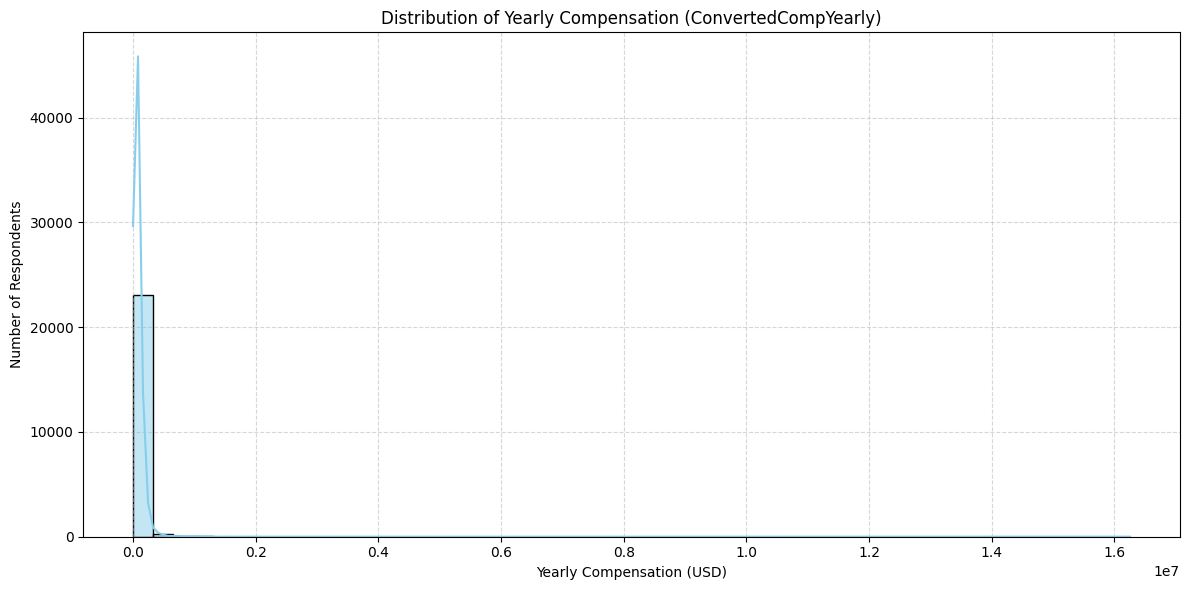

In [3]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp_data = df['ConvertedCompYearly'].dropna()
plt.figure(figsize=(12, 6))
sns.histplot(comp_data, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Make sure compensation is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Filter full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']
comp_values = full_time_df['ConvertedCompYearly'].dropna()
median_salary = comp_values.median()
print(f" Median Yearly Compensation (Full-Time Employees): ${median_salary:,.2f}")


 Median Yearly Compensation (Full-Time Employees): $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



/tmp/ipykernel_674/3414558954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='Country', y='ConvertedCompYearly', palette='Set2')


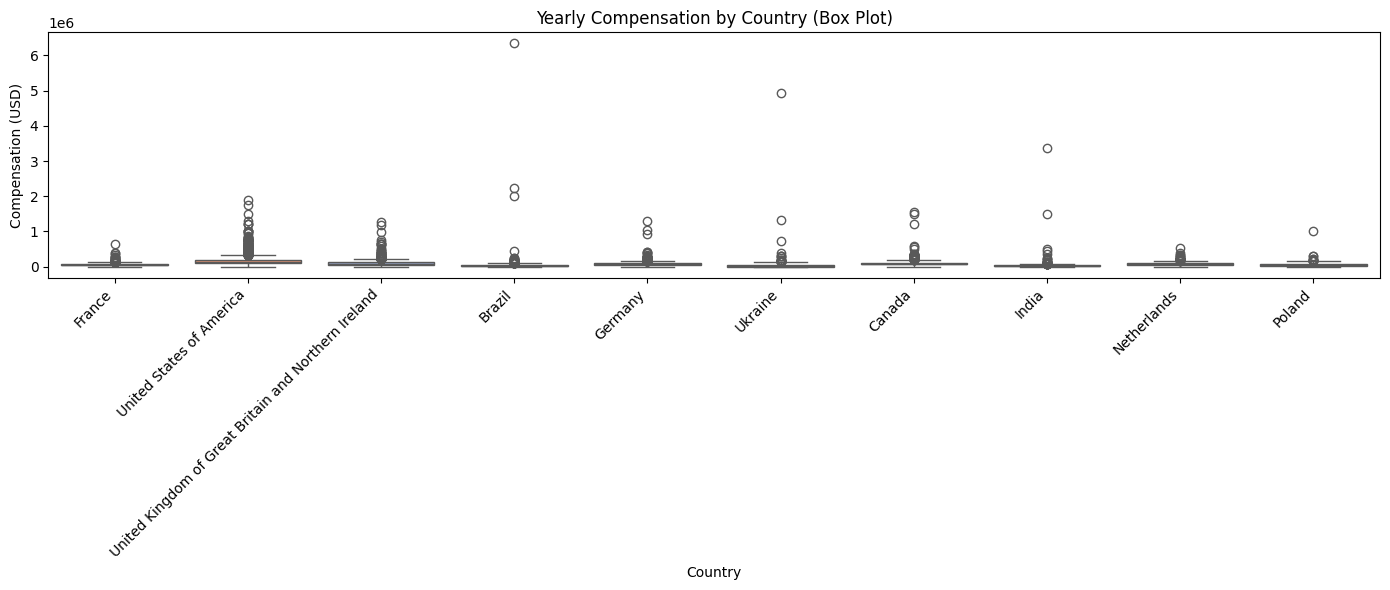

In [5]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df_country_salary = df[['Country', 'ConvertedCompYearly']].dropna()
top_countries = df_country_salary['Country'].value_counts().head(10).index
df_top = df_country_salary[df_country_salary['Country'].isin(top_countries)]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='Country', y='ConvertedCompYearly', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Yearly Compensation by Country (Box Plot)')
plt.ylabel('Compensation (USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


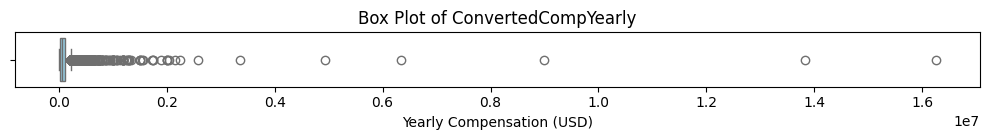

In [6]:
plt.figure(figsize=(10, 1.5))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title('Box Plot of ConvertedCompYearly')
plt.xlabel('Yearly Compensation (USD)')
plt.tight_layout()
plt.show()

In [7]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

comp_data = df['ConvertedCompYearly'].dropna()
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]
print(f"Original size: {df.shape[0]} rows")
print(f"Refined size (no outliers): {df_refined.shape[0]} rows")
print(f"Rows removed: {df.shape[0] - df_refined.shape[0]}")


Lower Bound: -80,177.25
Upper Bound: 220,860.75
Original size: 65437 rows
Refined size (no outliers): 22457 rows
Rows removed: 42980


In [8]:
df_refined.to_csv('refined_dataset_no_outliers.csv', index=False)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


/tmp/ipykernel_674/3789775188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['ConvertedCompYearly'] = pd.to_numeric(df_refined['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_674/3789775188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')
/tmp/ipykernel_674/3789775188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

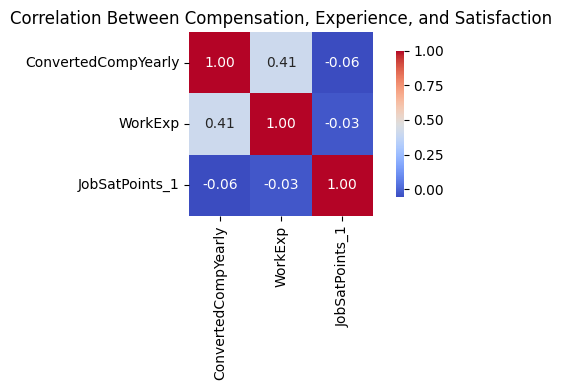

In [9]:
df_refined['ConvertedCompYearly'] = pd.to_numeric(df_refined['ConvertedCompYearly'], errors='coerce')
df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')
df_refined['JobSatPoints_1'] = pd.to_numeric(df_refined['JobSatPoints_1'], errors='coerce')
subset = df_refined[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()
corr_matrix = subset.corr(method='pearson')  # You can also use 'spearman' for non-linear
print(corr_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Compensation, Experience, and Satisfaction')
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


/tmp/ipykernel_674/130821540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['ConvertedCompYearly'] = pd.to_numeric(df_refined['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_674/130821540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')
/tmp/ipykernel_674/130821540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

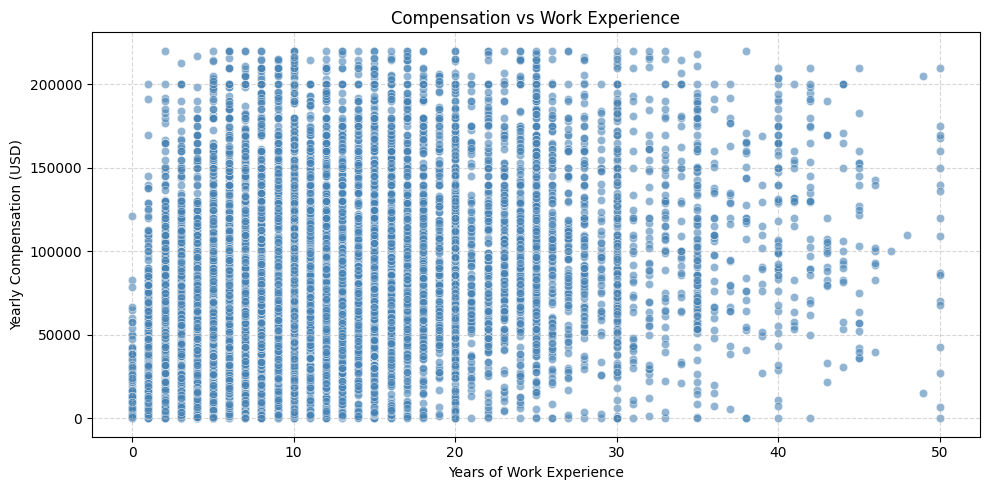

In [10]:
df_refined['ConvertedCompYearly'] = pd.to_numeric(df_refined['ConvertedCompYearly'], errors='coerce')
df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')
df_refined['JobSatPoints_1'] = pd.to_numeric(df_refined['JobSatPoints_1'], errors='coerce')
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_refined, x='WorkExp', y='ConvertedCompYearly', alpha=0.6, color='steelblue')
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



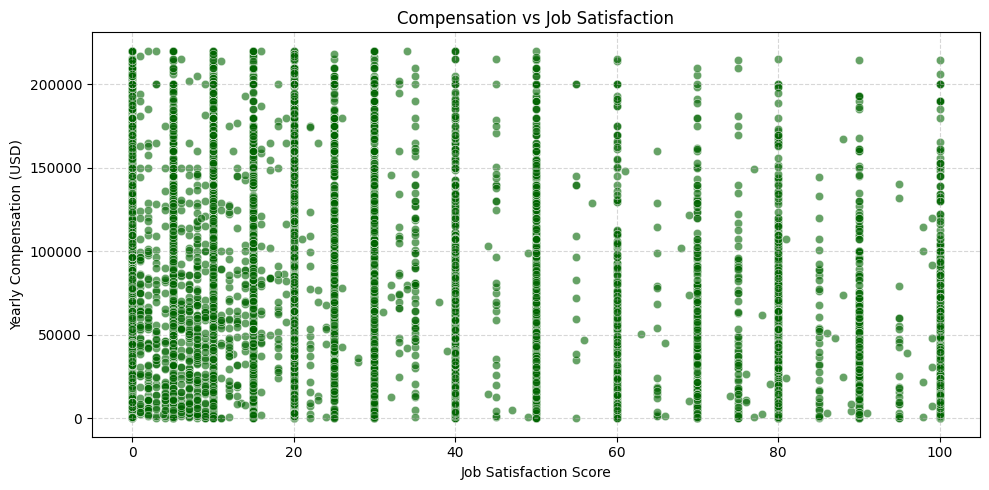

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_refined, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6, color='darkgreen')
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
